## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
import tensorflow as tf
from google.colab import drive, files
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

## Data Preprocessing

In [ ]:
# Mounting google drive to access data
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading data from google drive
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    )
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/My Doc/Datasets/BreaKHis 400X/train',
        target_size=(400, 400),
        batch_size=50,
        class_mode='binary')




test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/My Doc/Datasets/BreaKHis 400X/test',
        target_size=(400, 400),
        batch_size=50,
        class_mode='binary')

Found 1158 images belonging to 2 classes.
Found 545 images belonging to 2 classes.


## Building Model Using Transfer Learning

In [ ]:
# Using VGG16 as the base model
base_model = VGG16(input_shape= (400,400,3), include_top= False, weights="imagenet")
base_model.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_regularizer= tf.keras.regularizers.L2(0.01)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 12, 12, 512)       14714688  
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_2 (Dense)             (None, 100)               7372900   
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 22,087,689
Trainable params: 7,373,001
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
H = model.fit(train_generator, epochs=30, validation_data=test_generator)

Epoch 1/30
24/24 [==============================] - 80s 3s/step - loss: 4.2986 - accuracy: 0.5725 - val_loss: 1.8892 - val_accuracy: 0.5505
Epoch 2/30
24/24 [==============================] - 74s 3s/step - loss: 1.3602 - accuracy: 0.7254 - val_loss: 1.0172 - val_accuracy: 0.7633
Epoch 3/30
24/24 [==============================] - 75s 3s/step - loss: 0.8023 - accuracy: 0.8273 - val_loss: 0.8689 - val_accuracy: 0.7505
Epoch 4/30
24/24 [==============================] - 76s 3s/step - loss: 0.8952 - accuracy: 0.7547 - val_loss: 1.0490 - val_accuracy: 0.7064
Epoch 5/30
24/24 [==============================] - 75s 3s/step - loss: 0.7442 - accuracy: 0.7884 - val_loss: 0.6754 - val_accuracy: 0.8385
Epoch 6/30
24/24 [==============================] - 75s 3s/step - loss: 0.6150 - accuracy: 0.8212 - val_loss: 0.6305 - val_accuracy: 0.8349
Epoch 7/30
24/24 [==============================] - 75s 3s/step - loss: 0.5516 - accuracy: 0.8679 - val_loss: 0.6052 - val_accuracy: 0.8349
Epoch 8/30
24/24 [==

## Model Evaluation

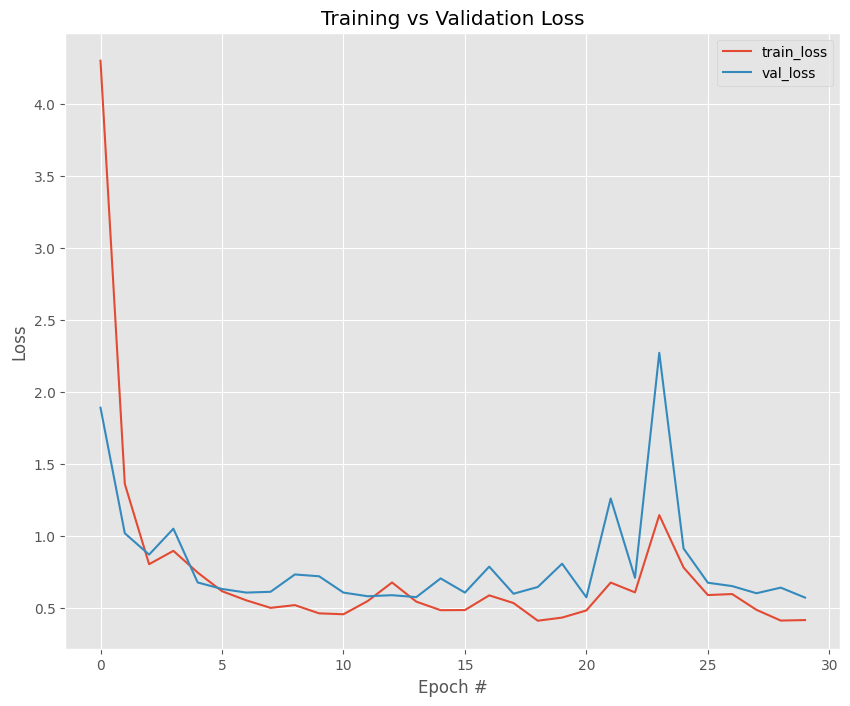

In [ ]:
epochs = np.arange(0, len(H.history['loss']))
plt.figure(figsize= (10, 8))

# Plot training and validation loss
plt.style.use('ggplot')
plt.plot(epochs, H.history['loss'], label = 'train_loss')
plt.plot(epochs, H.history['val_loss'], label = 'val_loss')
plt.title('Training vs Validation Loss')
plt.xlabel("Epoch #")
plt.ylabel('Loss')
plt.legend()

Saving SOB_M_MC-14-19979C-400-011.png to SOB_M_MC-14-19979C-400-011.png


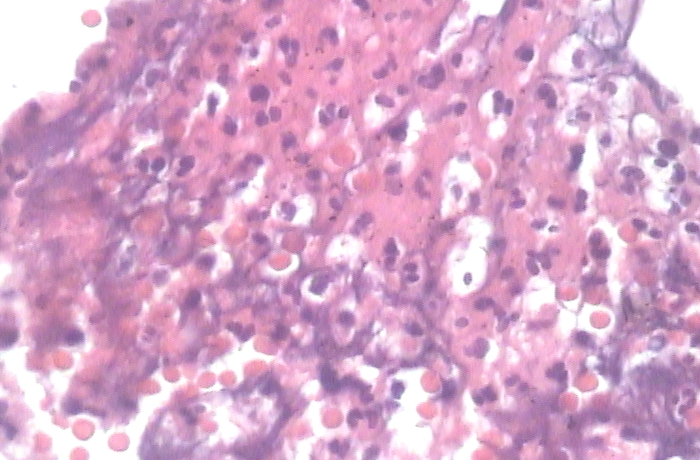

1/1 [==============================] - 0s 35ms/step
[[0.9720863]]
[0.9720863]
 
This image has cancerous cells (Malignant)!


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting Images
  path = '/content/' + fn
  display(Image.open("/content/" + fn))
  img = tf.keras.utils.load_img(path, target_size = (400, 400))
  x = tf.keras.utils.img_to_array(img)
  x = x / 255.0
  x = np.expand_dims(x, axis = 0)


  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  print(" ")

  if classes[0] > 0.5:
    print(f'This image has cancerous cells (Malignant)!')
  else:
    print(f'This image has no cancerous cells (Benign)!')